In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [41]:
train=pd.read_csv("train.csv")

In [42]:
test=pd.read_csv("test.csv")

In [5]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [7]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [8]:
train.isnull().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [9]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [10]:
data=pd.concat([train,test])

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
data.shape

(783667, 12)

In [12]:
train.shape,test.shape

((550068, 12), (233599, 11))

In [13]:
data.head(2)

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,0.0,0.0,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001


In [43]:
data.dtypes

Age                            object
City_Category                   int64
Gender                          int64
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Purchase                      float64
Stay_In_Current_City_Years     object
User_ID                         int64
dtype: object

In [15]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
data["Stay_In_Current_City_Years"].replace("4+","4",inplace=True)

In [17]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [18]:
data["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
data["Age"].replace('0-17','17',inplace=True)
data["Age"].replace('55+','56',inplace=True)
data["Age"].replace('26-35','30',inplace=True)
data["Age"].replace('46-50','48',inplace=True)
data["Age"].replace('51-55','53',inplace=True)
data["Age"].replace('36-45','40',inplace=True)
data["Age"].replace('18-25','21',inplace=True)

In [20]:
data["Age"].unique()

array(['17', '56', '30', '48', '53', '40', '21'], dtype=object)

In [21]:
data["Gender"].unique()

array(['F', 'M'], dtype=object)

In [22]:
data["Gender"].replace("F",0,inplace=True)
data["Gender"].replace('M',1,inplace=True)

In [23]:
data["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [24]:
data["City_Category"].replace('A',3,inplace=True)
data["City_Category"].replace('B',2,inplace=True)
data['City_Category'].replace('C',1,inplace=True)

In [25]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,17,3,0,0,10,3,0.0,0.0,P00069042,8370.0,2,1000001
1,17,3,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,17,3,0,0,10,12,0.0,0.0,P00087842,1422.0,2,1000001
3,17,3,0,0,10,12,14.0,0.0,P00085442,1057.0,2,1000001
4,56,1,1,0,16,8,0.0,0.0,P00285442,7969.0,4,1000002


In [28]:
train["Purchase"].groupby(train["Gender"]).mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [30]:
from scipy import stats
f ,p =stats.f_oneway(train["Purchase"][train["Gender"]=="M"],train["Purchase"][train['Gender']=="F"])
f,p

(2010.4424717228953, 0.0)

# Above result says that reject null hypothesis so mean are different

In [29]:
train["Purchase"].groupby(train["Marital_Status"]).mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [31]:
f ,p =stats.f_oneway(train["Purchase"][train["Marital_Status"]==0],train["Purchase"][train['Marital_Status']==1])
f,p

(0.11810893524268033, 0.7310947526475329)

# Above result state that we fail to reject null hypothesis so mean are equal

In [33]:
train["Purchase"].groupby(train["City_Category"]).mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [32]:
f ,p =stats.f_oneway(train["Purchase"][train["City_Category"]=='A'],train["Purchase"][train["City_Category"]=="B"],train["Purchase"][train["City_Category"]=="C"])
f,p

(1130.7459610102974, 0.0)

# Above result state that we reject the null hypothesis so mean are not equal

In [44]:
train["Purchase"].groupby(train["Age"]).mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [46]:
f ,p =stats.f_oneway(train["Purchase"][train["Age"]=='0-17'],train["Purchase"][train["Age"]=='18-25'],train["Purchase"][train["Age"]=='26-35']
                    ,train["Purchase"][train["Age"]=='36-45'],train["Purchase"][train["Age"]=='46-50'],train["Purchase"][train["Age"]=='51-55'],
                                                                                                                   train["Purchase"][train["Age"]=='55+'])
f,p

(40.57579909450407, 1.053563939251671e-49)

# Above result state that we reject the null hypothesis so mean are not equal


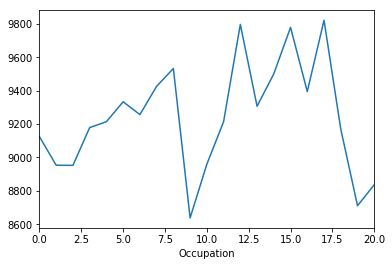

In [49]:
train["Purchase"].groupby(train["Occupation"]).mean().plot()

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
len(data["Product_ID"].unique())

3677

In [52]:
data["Product_ID"]=le.fit_transform(data["Product_ID"])

In [53]:
len(data["Product_ID"].unique())

3677

In [54]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,17,3,0,0,10,3,0.0,0.0,684,8370.0,2,1000001
1,17,3,0,0,10,1,6.0,14.0,2406,15200.0,2,1000001
2,17,3,0,0,10,12,0.0,0.0,868,1422.0,2,1000001
3,17,3,0,0,10,12,14.0,0.0,844,1057.0,2,1000001
4,56,1,1,0,16,8,0.0,0.0,2769,7969.0,4,1000002


In [55]:
data.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [56]:
train_new=data.iloc[:550068,:]
test_new=data.iloc[550068:,:]

In [57]:
train_new.shape,train.shape

((550068, 12), (550068, 12))

In [58]:
train_new.isnull().sum()

Age                           0
City_Category                 0
Gender                        0
Marital_Status                0
Occupation                    0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Product_ID                    0
Purchase                      0
Stay_In_Current_City_Years    0
User_ID                       0
dtype: int64

In [59]:
test_new.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [60]:
test_new.shape,test.shape

((233599, 12), (233599, 11))

In [61]:
test_new.drop('Purchase',inplace=True,axis=1)

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [62]:
test_new.shape,test.shape

((233599, 11), (233599, 11))

In [63]:
train_new["Age"]=pd.to_numeric(train_new["Age"])

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
train_new["Stay_In_Current_City_Years"]=pd.to_numeric(train_new["Stay_In_Current_City_Years"])

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
train_new.dtypes

Age                             int64
City_Category                   int64
Gender                          int64
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                      int32
Purchase                      float64
Stay_In_Current_City_Years      int64
User_ID                         int64
dtype: object

In [67]:
x=train_new.drop(['Purchase','Marital_Status'],axis=1)
y=train_new["Purchase"]

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.2)

In [72]:
from xgboost import XGBRegressor
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                      gamma=0.0,
                      learning_rate=0.05,
                      max_depth=6,
                      min_child_weight=1.5,
                      n_estimators=7200,
                      reg_alpha=0.9,
                      reg_lambda=0.6,
                      subsample=0.2,
                      seed=42,
                      silent=1)
regr.fit(x_train,y_train)

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1.5, missing=None, n_estimators=7200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0.9,
       reg_lambda=0.6, scale_pos_weight=1, seed=42, silent=1,
       subsample=0.2)

In [73]:
answer=regr.predict(x_cv)
np.sqrt(mean_squared_error(answer,y_cv))

2526.981541926774

In [74]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_cv)
np.sqrt(mean_squared_error(pred_lr,y_cv))

4620.412743129181

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
params={'colsample_bytree':[0.1,0.9],
                      'gamma':[0,0.2],
                      'learning_rate':[0.05,0.1],
                      'max_depth':[3,4,5],
                      'min_child_weight':[1,2],
                      'n_estimators':[100,150],
                      'reg_alpha':[0,1],
                      'reg_lambda':[0,1],
                      'subsample':[1],
                       }

In [66]:
gsearch=GridSearchCV(estimator=regr,param_grid=params,n_jobs=5,cv=5,scoring='neg_mean_squared_error')

In [67]:
import time

In [72]:
s=time.time()
gsearch.fit(x_train,y_train)
print("Time taken:",time.time()-s)

Time taken: 0.0


In [69]:
from sklearn.svm import SVR

In [71]:
clf=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
             kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [73]:
clf.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
pred_clf=clf.predict(x_cv)
np.sqrt(mean_squared_error(pred_clf,y_cv))

5109.329504523193

In [3]:
import winsound
winsound.MessageBeep()

In [64]:
from sklearn.metrics import SCORERS

In [65]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])